In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 1.01
Loading CCF brain structure data...
Loading time: 0.00
Loading selected CCF Atlas and Contour data...
Loading time: 1.68


In [2]:
ns = nmt.neuron_set('/home/penglab/FeaCal/Janelia_1000_rm')

Loading...
100 loaded: 5.1s
Invalid number of soma found: 0
QC failed: AA0114.swc
Invalid number of soma found: 0
QC failed: AA0115.swc
200 loaded: 3.8s
300 loaded: 4.3s
400 loaded: 4.4s
Invalid number of soma found: 0
QC failed: AA0472.swc
500 loaded: 4.5s
Invalid number of soma found: 0
QC failed: AA0576.swc
Invalid number of soma found: 0
QC failed: AA0585.swc
Invalid number of soma found: 0
QC failed: AA0589.swc
600 loaded: 3.9s
Invalid number of soma found: 0
QC failed: AA0639.swc
Invalid number of soma found: 0
QC failed: AA0670.swc
Invalid number of soma found: 0
QC failed: AA0672.swc
700 loaded: 3.9s
Invalid number of soma found: 0
QC failed: AA0754.swc
Invalid number of soma found: 0
QC failed: AA0763.swc
800 loaded: 4.8s
900 loaded: 3.2s
QC failed: AA0952.swc
QC failed: AA0964.swc
QC failed: AA0968.swc
QC failed: AA0977.swc
Finding soma locations...
Getting projection features...
Number of input neurons: 987
Number of input features: 632
Getting metadata...


In [8]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)


""


In [9]:
ns.features['soma_features'].region

,Hemisphere,Region
AA0001,1,SSp-m
AA0002,1,MOp
AA0003,1,MOp
AA0004,1,MOp
AA0005,1,MOp
AA0006,1,MOp
AA0007,1,SSp-ul
AA0008,1,SSp-ul
AA0009,1,MOp
AA0010,1,MOs


In [29]:
selectedNS= ns.metadata[ns.metadata['CellType']== 'SUB']
selectedNS = selectedNS.append(ns.metadata[ns.metadata['CellType']== 'ProS'])


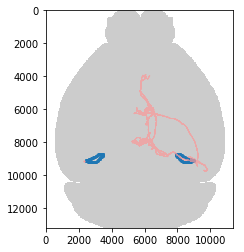

In [28]:
fig, ax =  plt.subplots(1,1)
border_line("Horizontal", 100, regions=['SUB'], ax=ax, bkground_ON = False)

cell_in_map(ns.neurons, ['AA0697'], ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="cluster",alpha=1, ax=ax)

In [31]:
len(selectedNS.index.tolist())

85

In [40]:
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map

def show_Neuron(viewINPUT, positionINPUT, outputPATH):
    NeuronAll = []
    num_neuron = 10
    count_c = 0
    for iterC in list(selectedNS.index.tolist()):
        NeuronAll.append(list(selectedNS.index.tolist())[count_c:(count_c + num_neuron)])
        count_c = count_c + num_neuron

    i = 0
    j = 0
    fig, ax = plt.subplots(len(NeuronAll)//5+1,5, figsize=(7.5, 10))
    #for iterc,iterL in zip(list(ns.metadata['Cluster'].unique())[:20],NeuronAll):
    for iterL in NeuronAll:
        if i % 5 == 0 and i !=0:
            i = 0
            j = j+1
        border_line(viewINPUT, positionINPUT, regions=['SUB'], ax=ax[j,i], bkground_ON = False)
        cell_in_map(ns.neurons, iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                    view="Horizontal", color="single_cell",alpha=1,ax=ax[j,i])
        ax[j,i].title.set_text(str(len(iterL)))#+str(iterc))
        ax[j,i].axis('off')
        i = i+1

    plt.savefig(outputPATH, bbox_inches='tight')
    plt.show()



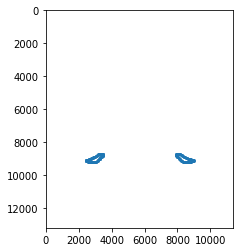

In [45]:
fig, ax =  plt.subplots(1,1)
border_line(viewINPUT, positionINPUT, regions=['SUB'], ax=ax, bkground_ON = False)

In [56]:
len(NeuronAll)

1

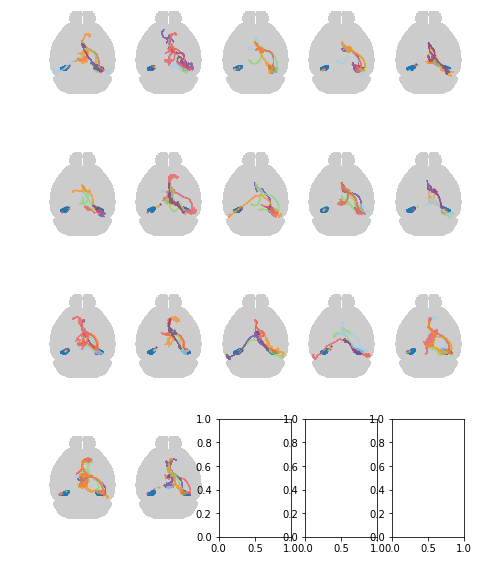

In [64]:
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "horizontal"
positionINPUT = 100
outputPATH = '/home/penglab/Desktop/Cell_in_map_18Dec.pdf'
NeuronAll = []
num_neuron = 5
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0
j = 0
fig, ax = plt.subplots(int(len(NeuronAll))//5+1,5, figsize=(7.5, 10))
#for iterc,iterL in zip(list(ns.metadata['Cluster'].unique())[:20],NeuronAll):
for iterL in NeuronAll:
    if i % 5 == 0 and i !=0:
        i = 0
        j = j+1
    border_line(viewINPUT, positionINPUT, regions=['SUB'], ax=ax[j,i], bkground_ON = False)
    cell_in_map(ns.neurons, iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="single_cell",alpha=1,ax=ax[j,i])
    #ax[j,i].title.set_text((str(iterL)))#+str(iterc))
    ax[j,i].axis('off')
    i = i+1

plt.savefig(outputPATH, bbox_inches='tight')
plt.show()

In [72]:
regionList = ['MM','AV','ENTm','RE','AM','ENTl','PL','BLA','ILA','COAp','COAa','TR',
                   'RSPv','OT','LSc','LSv','LSr','BST']

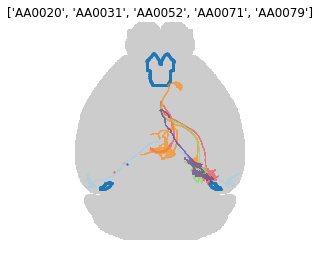

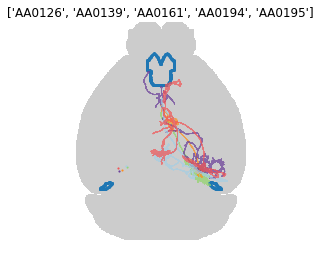

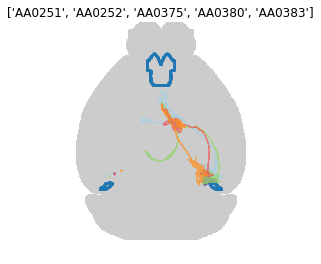

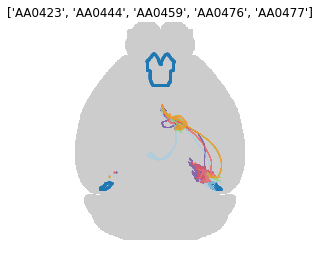

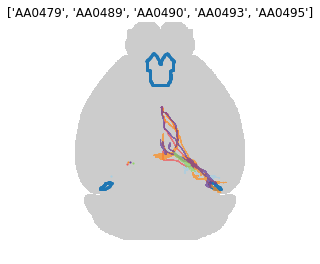

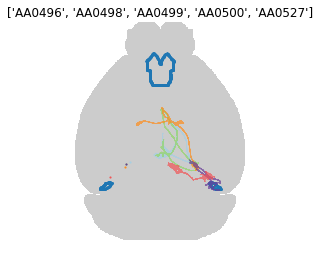

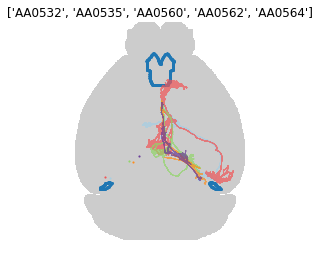

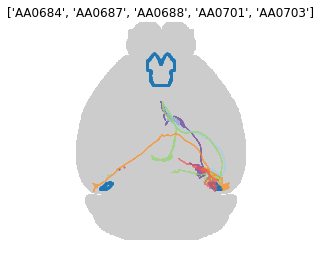

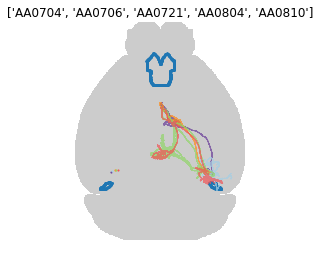

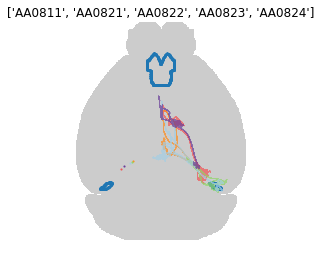

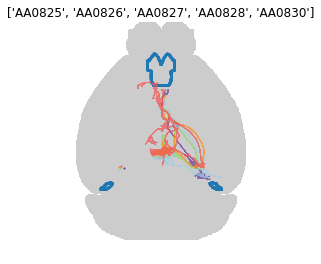

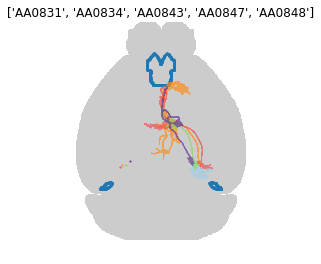

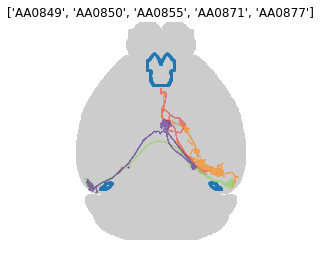

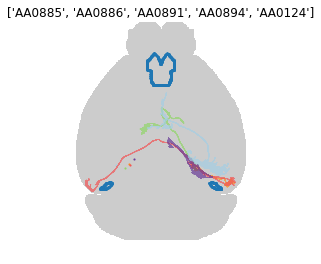

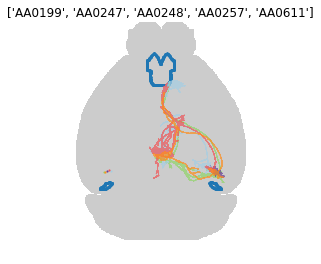

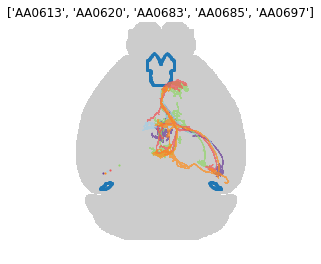

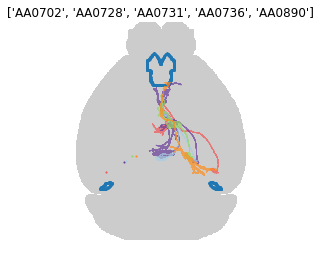

In [73]:
import os
from neuro_morpho_toolbox.plot import border_line
from neuro_morpho_toolbox.plot import cell_in_map
viewINPUT = "horizontal"
positionINPUT = 100
outputPATH = '/home/penglab/Desktop'
regionList
NeuronAll = []
num_neuron = 5
count_c = 0
while count_c < len(selectedNS.index.tolist()):
    NeuronAll.append(selectedNS.index.tolist()[count_c:(count_c + num_neuron)])
    count_c = count_c + num_neuron

i = 0

#fig, ax = plt.subplots(1,1)
for iterL in NeuronAll:
    fig, ax = plt.subplots(1,1)
    border_line(viewINPUT, positionINPUT, regions=regionList, ax=ax, bkground_ON = False)
    cell_in_map(ns.neurons, iterL, ns.metadata, ccf_annotation=nmt.annotation, 
                view="Horizontal", color="single_cell",alpha=1,ax=ax)
    ax.title.set_text(str((iterL)))#+str(iterc))
    ax.axis('off')
    i = i+1
    plt.savefig(os.path.join(outputPATH,'Cell_in_map_18Dec_' + str(i)+'.pdf'))
    plt.show()

In [68]:
os.path.join(outputPATH,'Cell_in_map_18Dec_' + str(i)+'.pdf')

'/home/penglab/Desktop/Cell_in_map_18Dec_17.pdf'